## Numerical Methods for ODEs
This Jupyter Notebook includes three different numerical methods for first-order ODEs: Standard Euler, Improved Euler, and Runge-Kutta.

In [66]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# define three functions for the three numerical methods

def euler(f,x0,y0,h,N,roundoff=10):
    """
    Standard Euler method
    
    Inputs:
    f: y'=f(x,y)
    x0: initial x
    y0: initial y
    h: step size
    N: number of interations
    roundoff: Number of decimal places to round to

    Outputs:
    Numerial appoximation y_i where i=0,...,N
    """
    x_i0 = x0
    y_i0 = y0
    x = [x_i0]
    y = [y_i0]
    for i in range(N):
        x_i1 = x_i0 + h
        y_i1 = np.round(y_i0 + h * f(x_i0,y_i0),decimals=roundoff)
        x.append(x_i1)
        y.append(y_i1)
        x_i0 = x_i1
        y_i0 = y_i1
    return np.array(x),np.array(y)

def euler_improved(f,x0,y0,h,N,roundoff=10):
    """
    Improved Euler method

    Inputs:
    f: y'=f(x,y)
    x0: initial x
    y0: initial y
    h: step size
    N: number of interations
    roundoff: Number of decimal places to round to

    Outputs:
    Numerial appoximation y_i where i=0,...,N
    """
    x_i0 = x0
    y_i0 = y0
    x = [x_i0]
    y = [y_i0]
    for i in range(N):
        x_i1 = x_i0 + h
        y_hat_i1 = np.round(y_i0 + h * f(x_i0,y_i0), decimals=roundoff)
        (y_i1) = np.round(y_i0 + 0.5 * h * (f(x_i0,y_i0)+f(x_i1,y_hat_i1)),decimals=roundoff)
        x.append(x_i1)
        y.append(y_i1)
        x_i0 = x_i1
        y_i0 = y_i1
    return np.array(x),np.array(y)

def runge_kutta(f,x0,y0,h,N,roundoff=10):
    """
    Runge-Kutta method

    Inputs:
    f: y'=f(x,y)
    x0: initial x
    y0: initial y
    h: step size
    N: number of interations
    roundoff: Number of decimal places to round to

    Outputs:
    Numerial appoximation y_i where i=0,...,N
    """
    x_i0 = x0
    y_i0 = y0
    x = [x_i0]
    y = [y_i0]
    for i in range(N):
        x_i1 = x_i0 + h
        k_1 = h * f(x_i0, y_i0)
        k_2 = h * f(x_i0 + 0.5*h, y_i0 + 0.5*k_1)
        k_3 = h * f(x_i0 + 0.5*h, y_i0 + 0.5*k_2)
        k_4 = h * f(x_i0 + h, y_i0 + k_3)
        y_i1 = np.round(y_i0 + 1/6*(k_1+2*k_2+2*k_3+k_4),decimals=roundoff)
        x.append(x_i1)
        y.append(y_i1)
        x_i0 = x_i1
        y_i0 = y_i1
    return np.array(x),np.array(y)  

### Task: Find the approximation of $y(x_i)$ where $i=0,...,N$ with the three different methods.<br>
$y'=f(x,y)=y+x, \quad x_0=0, \quad y(x_0)=0$ <br><br>
By the way, the analytical solution is $y=e^x-x-1$.

#### 1. Standard Euler with different step sizes

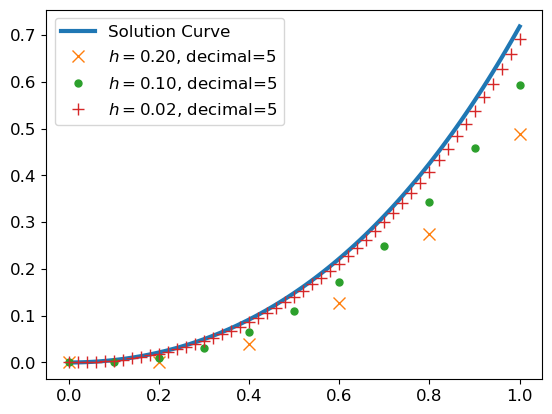

In [68]:
# plotting the analytical solution
x_analytical=np.linspace(0,1,100)
y_analytical=np.exp(x_analytical)-x_analytical-1
plt.plot(x_analytical, y_analytical, linewidth=3, label='Solution Curve')

# define f
def f(x,y):
    return y+x

# h=0.2
h=0.2
N=int(1/h)
plt.plot(np.linspace(0,1,N+1),euler(f=f,x0=0,y0=0,h=h,N=N,roundoff=5)[1],'x', markersize=8, label='$h=%0.2f$, decimal=5'%h)

# h=0.1
h=0.1
N=int(1/h)
plt.plot(np.linspace(0,1,N+1),euler(f=f,x0=0,y0=0,h=h,N=N,roundoff=5)[1],'o', markersize=5, label='$h=%0.2f$, decimal=5'%h)

# h=0.02
h=0.02
N=int(1/h)
plt.plot(np.linspace(0,1,N+1),euler(f=f,x0=0,y0=0,h=h,N=N,roundoff=5)[1],'+', markersize=8, label='$h=%0.2f$, decimal=5'%h)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

#### 2. Standard Euler with different roundings

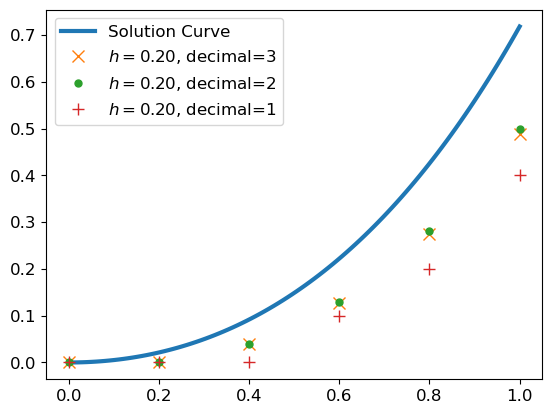

In [69]:
# plotting the analytical solution
x_analytical=np.linspace(0,1,100)
y_analytical=np.exp(x_analytical)-x_analytical-1
plt.plot(x_analytical, y_analytical, linewidth=3, label='Solution Curve')

# define f
def f(x,y):
    return y+x

h=0.2
N=int(1/h)

# roundoff=3
plt.plot(np.linspace(0,1,N+1),euler(f=f,x0=0,y0=0,h=h,N=N,roundoff=3)[1],'x', markersize=8, label='$h=%0.2f$, decimal=3'%h)

# roundoff=2
plt.plot(np.linspace(0,1,N+1),euler(f=f,x0=0,y0=0,h=h,N=N,roundoff=2)[1],'o', markersize=5, label='$h=%0.2f$, decimal=2'%h)

# roundoff=1
plt.plot(np.linspace(0,1,N+1),euler(f=f,x0=0,y0=0,h=h,N=N,roundoff=1)[1],'+', markersize=8, label='$h=%0.2f$, decimal=1'%h)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

#### 3. Three different numerical methods

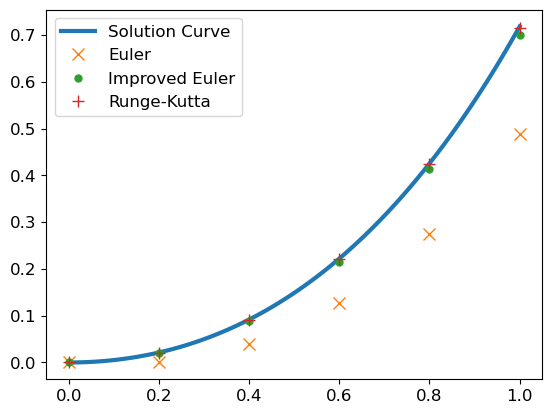

In [79]:
# plotting the analytical solution
x_analytical=np.linspace(0,1,100)
y_analytical=np.exp(x_analytical)-x_analytical-1
plt.plot(x_analytical, y_analytical, linewidth=3, label='Solution Curve')

# define f
def f(x,y):
    return y+x

h=0.2
N=int(1/h)

# Standard Euler
plt.plot(np.linspace(0,1,N+1),euler(f=f,x0=0,y0=0,h=h,N=N,roundoff=3)[1],'x', markersize=8, label='Euler')

# Improved Euler
plt.plot(np.linspace(0,1,N+1),euler_improved(f=f,x0=0,y0=0,h=h,N=N,roundoff=3)[1],'o', markersize=5, label='Improved Euler')

# Runge-Kutta
plt.plot(np.linspace(0,1,N+1),runge_kutta(f=f,x0=0,y0=0,h=h,N=N,roundoff=3)[1],'+', markersize=8, label='Runge-Kutta')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()